# Setup

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten, Activation, Conv2D

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Path

In [19]:
train_path = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
test_path = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

This quick way for me to label all my classes

In [20]:
classes = []

for i in range(0,26):
    classes.append(chr(ord('A') + i))

# Preprocessing Data

In [69]:
generator = ImageDataGenerator(validation_split=0.2)

train_batches = generator.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              classes = classes,
                                              color_mode='rgb',
                                              batch_size=10,
                                              subset='training')
valid_batches = generator.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              classes = classes,
                                              color_mode='rgb',
                                              batch_size=4,
                                              subset= 'validation')
# test_batches = train_batches = ImageDataGenerator().flow_from_directory(test_path,
#                                                          target_size=(200,200),
#                                                          color_mode='grayscale',
#                                                          batch_size=10)

Found 62400 images belonging to 26 classes.
Found 15600 images belonging to 26 classes.


In [70]:
images, labels = next(train_batches)


In [71]:
def plot_images(images):
    for i in range(10):
        plt.imshow(np.squeeze(images[i]))
        plt.title(classes[int(np.where(labels[i] == 1)[0])])
        plt.show()

# Plotting Images

Can verify labels are correct with provided chart

In [72]:
%%html
<img src="RefImg.jpg" alt="ASL-Alphabet">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


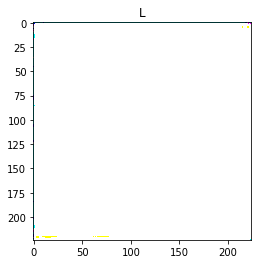

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


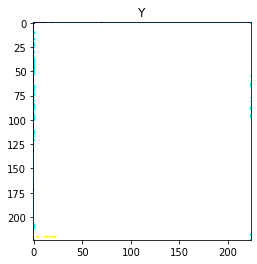

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


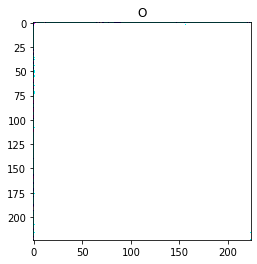

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


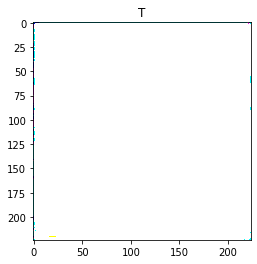

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


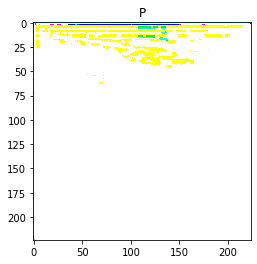

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


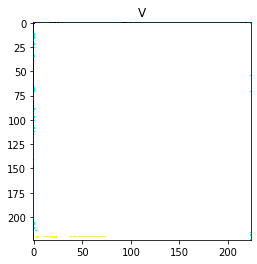

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


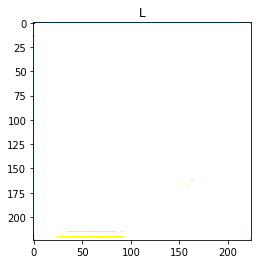

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


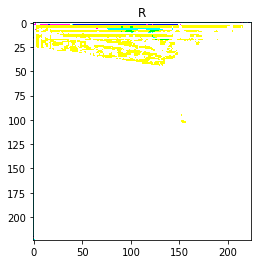

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


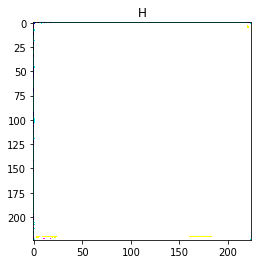

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


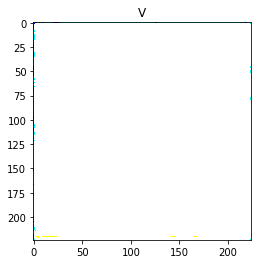

In [73]:
plot_images(images)

# Build Model

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = (200,200,3)))
model.add(Flatten())
model.add(Dense(26, activation='softmax'))


In [75]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [76]:
model.fit_generator(train_batches,
                    steps_per_epoch=4,
                    validation_data=valid_batches,
                    validation_steps=4,
                    epochs=20,
                    verbose=2)

Epoch 1/20


ValueError: Error when checking input: expected conv2d_5_input to have shape (200, 200, 3) but got array with shape (224, 224, 3)

In [80]:
vgg16_model = keras.applications.vgg16.VGG16()


In [81]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

# Modify Model


In [82]:
#removing last layer and add mine

model.layers.pop()
model.add(Dense(26, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [84]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches,
                    steps_per_epoch=4,
                    validation_data=valid_batches,
                    validation_steps=4,
                    epochs=20,
                    verbose=2)

Epoch 1/20
 - 15s - loss: 3.2564 - accuracy: 0.0750 - val_loss: 3.2511 - val_accuracy: 0.0625
Epoch 2/20
 - 14s - loss: 3.2554 - accuracy: 0.0500 - val_loss: 3.2756 - val_accuracy: 0.0625
Epoch 3/20
 - 15s - loss: 3.2522 - accuracy: 0.0750 - val_loss: 3.2451 - val_accuracy: 0.0000e+00
Epoch 4/20
 - 14s - loss: 3.2502 - accuracy: 0.0500 - val_loss: 3.2206 - val_accuracy: 0.0000e+00
Epoch 5/20
 - 14s - loss: 3.2681 - accuracy: 0.0000e+00 - val_loss: 3.2530 - val_accuracy: 0.0000e+00
Epoch 6/20
 - 15s - loss: 3.2591 - accuracy: 0.0250 - val_loss: 3.2597 - val_accuracy: 0.1875
Epoch 7/20
 - 14s - loss: 3.2549 - accuracy: 0.0750 - val_loss: 3.2374 - val_accuracy: 0.0625
Epoch 8/20
 - 15s - loss: 3.2655 - accuracy: 0.0000e+00 - val_loss: 3.2649 - val_accuracy: 0.1250
Epoch 9/20
 - 16s - loss: 3.2527 - accuracy: 0.1250 - val_loss: 3.2664 - val_accuracy: 0.0000e+00
Epoch 10/20
 - 14s - loss: 3.2571 - accuracy: 0.0500 - val_loss: 3.2569 - val_accuracy: 0.0625
Epoch 11/20
 - 14s - loss: 3.2534 -